# Exploring Two or More Variables

## Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
kc_tax0 = pd.read_csv('../data/kc_tax.csv')
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [3]:
kc_tax0_strip = kc_tax0.loc[
    (kc_tax0["TaxAssessedValue"] < 750_000) &
    (kc_tax0["SqFtTotLiving"] > 100) &
    (kc_tax0["SqFtTotLiving"] < 3500),
    :
]

kc_tax0_strip

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


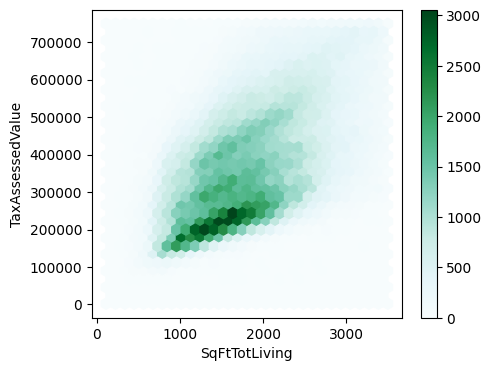

In [4]:
ax = kc_tax0_strip.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30, sharex=False, figsize=(5,4))

As you can see, _hexagonal binning plot_ shows the tax-assessed value, square foot and the count of records for bins at the same time.

## Contours

We take a sample from our dataset because it takes too much time to render.

In [5]:
sample = kc_tax0_strip.sample(n=5000, random_state=42)

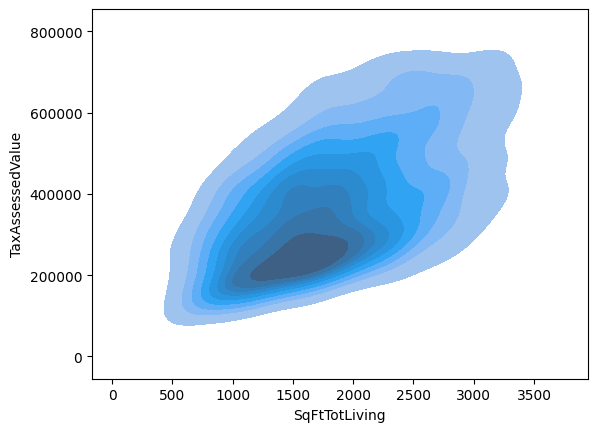

In [6]:
ax = sns.kdeplot(x=sample.SqFtTotLiving, y=sample.TaxAssessedValue, fill=True)

## Contingency Tables

In [7]:
lc_loans = pd.read_csv("../data/lc_loans.csv")
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [8]:
crosstab = lc_loans.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [9]:
columns = crosstab.loc[:, "Charged Off":"All"].columns
crosstab[columns] = crosstab[columns].astype('float', copy=False)

df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df["All"], axis='index')

df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## Categorical and Numeric Data

In [10]:
airline_stats = pd.read_csv("../data/airline_stats.csv")
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


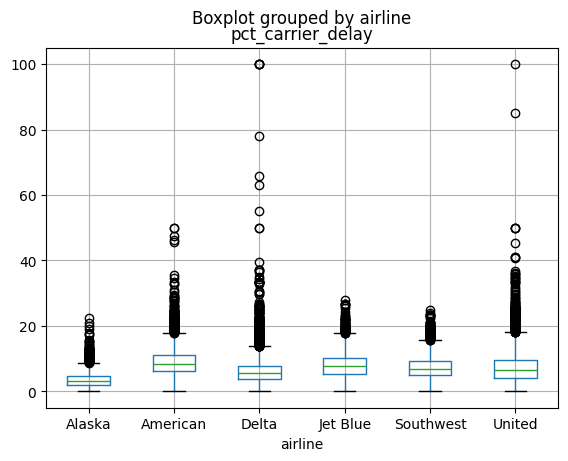

In [11]:
ax = airline_stats.boxplot(by="airline", column="pct_carrier_delay")

As informative as boxplots are, using a different type of plot here, which is violin plot, eliminates the ugly appearance caused by outliers.

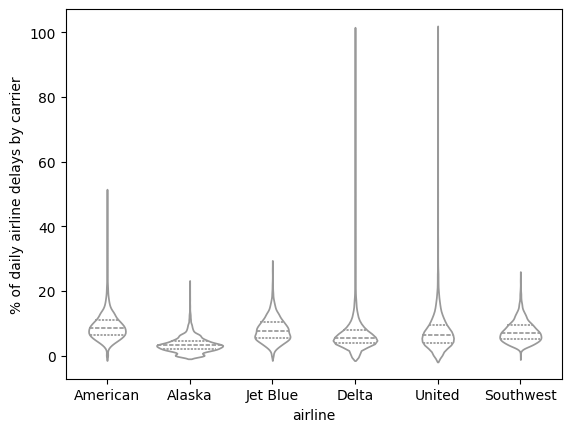

In [12]:
ax = sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay, inner="quartile", color="white")
_ =  ax.set_ylabel("% of daily airline delays by carrier")

## Visualizing Mulitple Variables

In [13]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


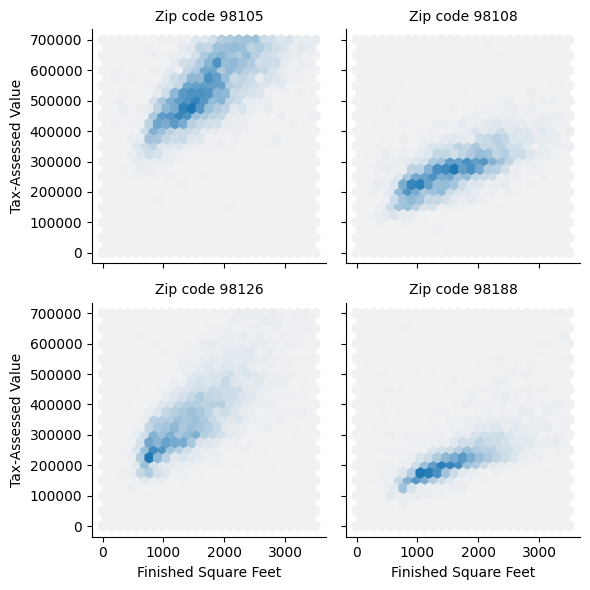

In [14]:
import matplotlib.pyplot as plt

def hexbin(x,y,color,**kwargs):
    cmap = sns.light_palette(color,as_cmap=True)
    plt.hexbin(x,y,gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col="ZipCode", col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0,3500,0,700000])
g.set_axis_labels("Finished Square Feet", "Tax-Assessed Value")
g.set_titles("Zip code {col_name:.0f}")